#PARTE 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# --- 1. Carregamento dos Dados ---
# Certifique-se de que o arquivo 'energydata_complete.csv' está na mesma pasta que este script,
# ou forneça o caminho completo para o arquivo.
try:
    df = pd.read_csv('energydata_complete.csv')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'energydata_complete.csv' não foi encontrado.")
    print("Por favor, verifique o nome e o local do arquivo.")
    exit()

# --- 2. Pré-processamento e Engenharia de Features ---

# Converte a coluna 'date' para o formato datetime
df['date'] = pd.to_datetime(df['date'])

# Cria novas features a partir da data para capturar padrões temporais
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Remove as colunas originais 'date' e 'lights' (conforme solicitado no exercício,
# focando nas variáveis ambientais)
df = df.drop(['date', 'lights'], axis=1)

# Separa as variáveis independentes (X) da variável dependente (y)
X = df.drop('Appliances', axis=1)  # Todas as colunas, exceto o consumo
y = df['Appliances']              # Apenas a coluna de consumo (nosso alvo)

# Divide os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Treinamento e Avaliação dos Modelos ---

# Inicializa os modelos que serão testados
models = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Regressão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Dicionário para armazenar os resultados de cada modelo
results = {}

# Itera sobre cada modelo para treiná-lo e avaliá-lo
for name, model in models.items():
    print(f"Treinando o modelo: {name}...")

    # Treina o modelo com os dados de treino
    model.fit(X_train, y_train)

    # Faz previsões com os dados de teste
    y_pred = model.predict(X_test)

    # Calcula as métricas de avaliação
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Armazena os resultados
    results[name] = {'R²': r2, 'RMSE': rmse, 'MAE': mae}
    print(f"Treinamento de {name} concluído.")

# --- 4. Comparação dos Resultados ---

# Converte o dicionário de resultados em um DataFrame do pandas para melhor visualização
results_df = pd.DataFrame(results).T

print("\n--- Resultados da Avaliação dos Modelos ---")
print(results_df)

# --- 5. Análise e Conclusão ---
# Encontra o melhor modelo com base no R² (quanto maior, melhor)
best_model_r2 = results_df['R²'].idxmax()
# Encontra o melhor modelo com base no RMSE (quanto menor, melhor)
best_model_rmse = results_df['RMSE'].idxmin()

print(f"\nMelhor modelo com base no R²: {best_model_r2} ({results_df.loc[best_model_r2, 'R²']:.4f})")
print(f"Melhor modelo com base no RMSE: {best_model_rmse} ({results_df.loc[best_model_rmse, 'RMSE']:.2f} Wh)")

Arquivo carregado com sucesso!
Treinando o modelo: Regressão Linear...
Treinamento de Regressão Linear concluído.
Treinando o modelo: Árvore de Regressão...
Treinamento de Árvore de Regressão concluído.
Treinando o modelo: Random Forest...
Treinamento de Random Forest concluído.

--- Resultados da Avaliação dos Modelos ---
                           R²       RMSE        MAE
Regressão Linear     0.148735  92.296723  53.336337
Árvore de Regressão  0.217750  88.476249  36.136306
Random Forest        0.595544  63.619391  30.020091

Melhor modelo com base no R²: Random Forest (0.5955)
Melhor modelo com base no RMSE: Random Forest (63.62 Wh)


Arquivo 'smart_grid_stability_augmented.csv' carregado com sucesso!
Treinando o modelo: Árvore de Decisão...
Treinamento de Árvore de Decisão concluído.
Treinando o modelo: KNN (K-Nearest Neighbors)...
Treinamento de KNN (K-Nearest Neighbors) concluído.
Treinando o modelo: Regressão Logística...
Treinamento de Regressão Logística concluído.

--- Resultados da Avaliação dos Modelos de Classificação ---

========== Modelo: Árvore de Decisão ==========
  Acurácia: 0.8953
  F1-Score (Weighted): 0.8953

  Relatório de Classificação:
              precision    recall  f1-score   support

      stable       0.86      0.86      0.86      4344
    unstable       0.92      0.92      0.92      7656

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000


========== Modelo: KNN (K-Nearest Neighbors) ==========
  Acurácia: 0.8317
  F1-Score (Weighted): 0.8295

  Relatório de Classificação:
  

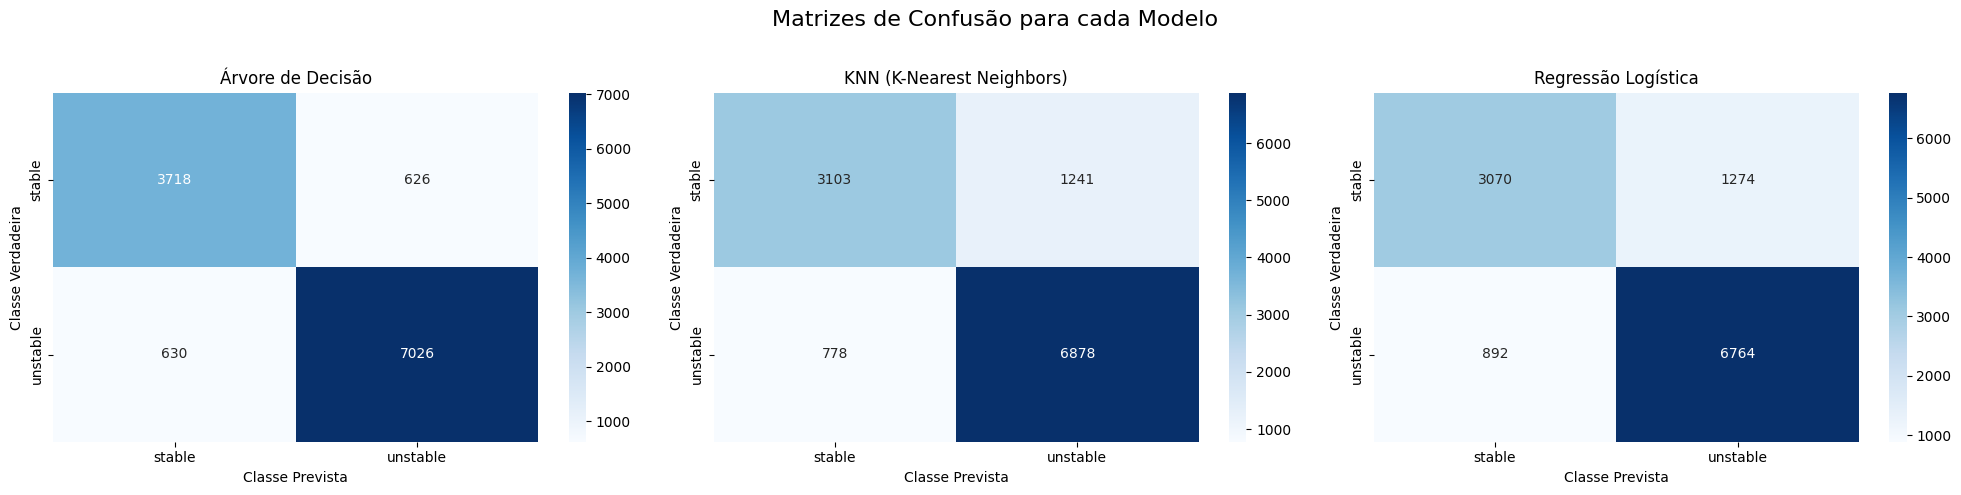

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Carregamento dos Dados ---
# Certifique-se de que o arquivo 'smart_grid_stability_augmented.csv' está na mesma pasta.
try:
    df = pd.read_csv('smart_grid_stability_augmented.csv')
    print("Arquivo 'smart_grid_stability_augmented.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'smart_grid_stability_augmented.csv' não foi encontrado.")
    print("Por favor, verifique o nome e o local do arquivo.")
    exit()

# --- 2. Pré-processamento dos Dados ---

# 'stab' é a representação numérica do tempo até a instabilidade.
# 'stabf' é a nossa classe alvo categórica ('stable' ou 'unstable').
# Vamos remover a coluna 'stab' para evitar vazamento de dados, já que ela está
# diretamente relacionada ao nosso alvo.
df = df.drop('stab', axis=1)

# Separa as variáveis independentes (X) da variável alvo (y)
X = df.drop('stabf', axis=1)
y = df['stabf']

# Codifica a variável alvo 'stabf' para um formato numérico.
# A classe 'stable' se tornará 0 e 'unstable' se tornará 1.
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# 'le.classes_' nos mostrará o mapeamento (ex: ['stable', 'unstable'])

# Divide os dados em conjuntos de treino (80%) e teste (20%).
# 'stratify=y_encoded' garante que a proporção de classes seja a mesma
# nos conjuntos de treino e teste, o que é importante para classificação.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# --- 3. Treinamento e Avaliação dos Modelos ---

# Inicializa os modelos que serão testados
models = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'KNN (K-Nearest Neighbors)': KNeighborsClassifier(),
    'Regressão Logística': LogisticRegression(random_state=42, max_iter=1000)
}

# Dicionário para armazenar os resultados
results = {}

# Itera sobre cada modelo para treiná-lo e avaliá-lo
for name, model in models.items():
    print(f"Treinando o modelo: {name}...")

    # Treina o modelo
    model.fit(X_train, y_train)

    # Faz as previsões
    y_pred = model.predict(X_test)

    # Calcula as métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # 'weighted' para F1-score balanceado
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)

    # Armazena os resultados
    results[name] = {'Acurácia': accuracy, 'F1-Score': f1, 'Matriz de Confusão': cm, 'Relatório': report}
    print(f"Treinamento de {name} concluído.")

# --- 4. Comparação dos Resultados ---

print("\n--- Resultados da Avaliação dos Modelos de Classificação ---")
for name, metrics in results.items():
    print(f"\n========== Modelo: {name} ==========")
    print(f"  Acurácia: {metrics['Acurácia']:.4f}")
    print(f"  F1-Score (Weighted): {metrics['F1-Score']:.4f}")
    print("\n  Relatório de Classificação:")
    print(metrics['Relatório'])

# --- 5. Visualização das Matrizes de Confusão ---
# Cria uma figura para plotar as 3 matrizes de confusão lado a lado
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Matrizes de Confusão para cada Modelo', fontsize=16)

for i, (name, metrics) in enumerate(results.items()):
    cm = metrics['Matriz de Confusão']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=le.classes_, yticklabels=le.classes_)
    axes[i].set_title(name)
    axes[i].set_xlabel('Classe Prevista')
    axes[i].set_ylabel('Classe Verdadeira')

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Salva a figura em um arquivo
plt.savefig('matrizes_confusao_classificacao.png')

print("\nAs matrizes de confusão foram salvas no arquivo 'matrizes_confusao_classificacao.png'")

#PARTE 2

## Exercício 1


Colunas: ['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']
Tamanho original: (32686, 11)
Após dropna: (32686, 11)
Mediana de Radiation = 2.6600
Features usadas: ['UNIXTime', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
=== Modelo: Decision Tree ===
Acurácia: 0.9433000203956761
Matriz de Confusão:
 [[4631  272]
 [ 284 4619]]
Relatório:
               precision    recall  f1-score   support

           0     0.9422    0.9445    0.9434      4903
           1     0.9444    0.9421    0.9432      4903

    accuracy                         0.9433      9806
   macro avg     0.9433    0.9433    0.9433      9806
weighted avg     0.9433    0.9433    0.9433      9806


=== Modelo: Random Forest ===
Acurácia: 0.9438099122985927
Matriz de Confusão:
 [[4741  162]
 [ 389 4514]]
Relatório:
               precision    recall  f1-score   support

           0     0.9242    0.9670   

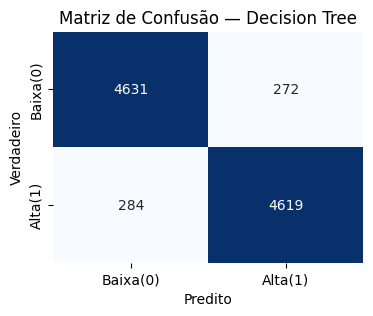

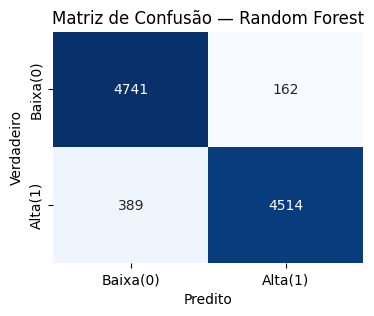

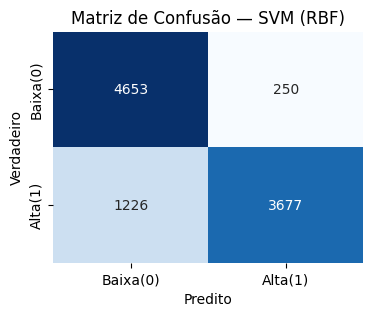

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Carregar dados (coloque o caminho correto do CSV)
df = pd.read_csv("SolarPrediction.csv")

# 2) Inspecionar colunas / limpar
print("Colunas:", df.columns.tolist())
print("Tamanho original:", df.shape)
df = df.dropna()
print("Após dropna:", df.shape)

# 3) Ver a coluna de radiação e criar alvo (usando mediana)
# Ajuste 'Radiation' caso o nome da coluna seja diferente — inspect acima mostra o nome real.
if 'Radiation' not in df.columns:
    # Tentar heurística comum
    possible = [c for c in df.columns if 'radi' in c.lower()]
    print("Coluna de radiação encontrada por heurística:", possible)
    radiation_col = possible[0]
else:
    radiation_col = 'Radiation'

y_numeric = df[radiation_col]
threshold = y_numeric.median()
print(f"Mediana de {radiation_col} = {threshold:.4f}")

# Criar alvo binário: 1 = Alta Radiação (>= mediana), 0 = Baixa (< mediana)
df['target'] = (y_numeric >= threshold).astype(int)

# 4) Selecionar atributos preditores (remover a coluna de radiação e colunas não numéricas)

exclude = {radiation_col, 'target'}
X = df.select_dtypes(include=[np.number]).drop(columns=list(exclude), errors='ignore')
print("Features usadas:", X.columns.tolist())


# 5) Separar treino/teste (70/30), mantendo proporção de classes (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, df['target'], test_size=0.30, random_state=42, stratify=df['target']
)

# 6) Normalizar atributos contínuos (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7) Treinar modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=False, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    results[name] = {'accuracy': acc, 'confusion_matrix': cm, 'report': report}
    print("=== Modelo:", name, "===")
    print("Acurácia:", acc)
    print("Matriz de Confusão:\n", cm)
    print("Relatório:\n", report)
    print()

# 8) Plot matriz de confusão para cada modelo
for name, res in results.items():
    cm = res['confusion_matrix']
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusão — {name}")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.xticks([0.5, 1.5], ["Baixa(0)","Alta(1)"])
    plt.yticks([0.5, 1.5], ["Baixa(0)","Alta(1)"])
    plt.show()


## Exerício 2


Colunas: ['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
Shape inicial: (50530, 5)
Shape após dropna: (50530, 5)
Atributos usados: ['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

=== Regressão Linear ===
RMSE: 411.7100
R²: 0.9007

=== Árvore de Regressão ===
RMSE: 538.7904
R²: 0.8299

=== Random Forest ===
RMSE: 412.8221
R²: 0.9001

Resumo dos resultados:
                            RMSE        R²
Regressão Linear     411.710022  0.900660
Árvore de Regressão  538.790375  0.829870
Random Forest        412.822145  0.900123


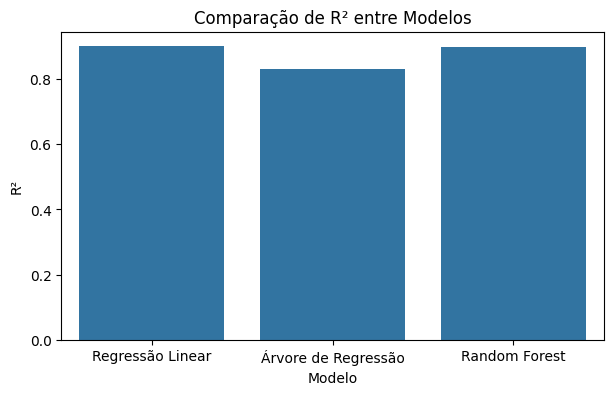

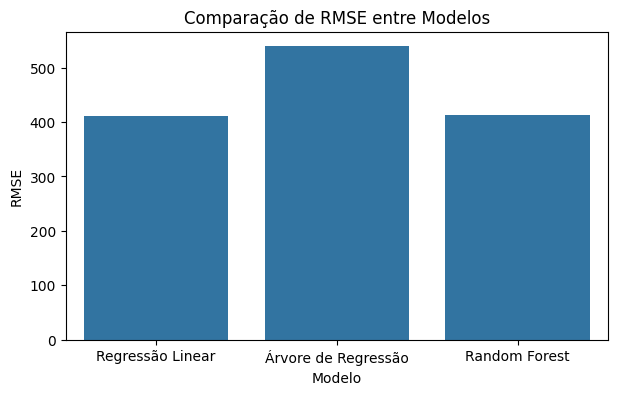

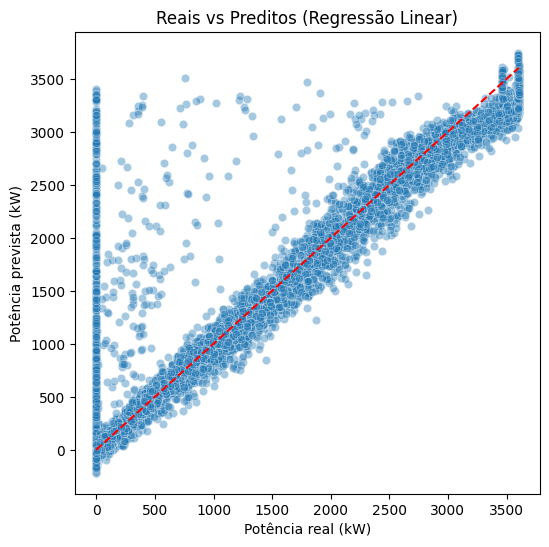

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Carregar dataset
df = pd.read_csv("T1.csv")

print("Colunas:", df.columns.tolist())
print("Shape inicial:", df.shape)

# 2) Limpeza de dados
df = df.dropna()
print("Shape após dropna:", df.shape)

# 3) Definir variável alvo (potência gerada)
# Normalmente, a coluna alvo é 'LV ActivePower (kW)'
if 'LV ActivePower (kW)' in df.columns:
    target_col = 'LV ActivePower (kW)'
else:
    # Tentativa automática caso o nome varie
    target_col = [c for c in df.columns if 'power' in c.lower()][0]

y = df[target_col]

# 4) Selecionar atributos preditores
# Remover colunas não numéricas e a própria potência
X = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')

print("Atributos usados:", X.columns.tolist())

# 5) Separar dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 6) Normalizar dados (se necessário)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7) Treinar modelos
models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Regressão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R²": r2}

    print(f"\n=== {name} ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

# 8) Comparar resultados em gráfico
results_df = pd.DataFrame(results).T
print("\nResumo dos resultados:\n", results_df)

plt.figure(figsize=(7,4))
sns.barplot(data=results_df.reset_index(), x='index', y='R²')
plt.title('Comparação de R² entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(data=results_df.reset_index(), x='index', y='RMSE')
plt.title('Comparação de RMSE entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()

# 9) Visualização: valores reais vs previstos (modelo mais preciso)
best_model_name = max(results, key=lambda x: results[x]["R²"])
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.4)
plt.title(f"Reais vs Preditos ({best_model_name})")
plt.xlabel("Potência real (kW)")
plt.ylabel("Potência prevista (kW)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
